In [2]:
source('functions.R')

DATASET_FILENAME = './combined.csv'

MYLIBRARIES<-c("outliers",
               "corrplot",
               "MASS",
               "formattable",
               "stats",
               "caret",
               "PerformanceAnalytics",
               "smotefamily")

install.packages('e1071')
library(caret)
library(e1071)

# ************************************************
# This is where R starts execution

# Automatically release memory
gc()

# Tries to clear plots and other graphics in RStudio output
if(!is.null(dev.list())) dev.off()
graphics.off()

# This clears all warning messages
#assign("last.warning", NULL, envir = baseenv())

# clears the RStudio console area
cat("\014")

# If library not already on your computer this will download and
# install the library. Each library is activated.
library(pacman)
pacman::p_load(char=MYLIBRARIES,install=TRUE,character.only=TRUE)

Warning message in install.packages("e1071"):
“installation of package ‘e1071’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: ggplot2

Loading required package: lattice



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2296801,122.7,4465384,238.5,3746467,200.1
Vcells,3933000,30.1,8388608,64.0,7324313,55.9


null device 
          1

In [3]:
dataset<- NreadDataset(DATASET_FILENAME)
# remove unwanted columns 
required_cols<-!names(dataset)%in%c("X")
dataset<- dataset[,required_cols]
names(dataset)

[1] "CSV dataset ./combined.csv has been read. Records= 259760"


[1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "Age"                           
 [5] "TypeofTravel"                   "Class"                         
 [7] "FlightDistance"                 "Seatcomfort"                   
 [9] "DepartureArrivaltimeconvenient" "Foodanddrink"                  
[11] "Gatelocation"                   "Inflightwifiservice"           
[13] "Inflightentertainment"          "EaseofOnlinebooking"           
[15] "Onboardservice"                 "Legroomservice"                
[17] "Baggagehandling"                "Checkinservice"                
[19] "Cleanliness"                    "Onlineboarding"                
[21] "DepartureDelayinMinutes"        "ArrivalDelayinMinutes"

In [4]:
head(dataset)

,satisfactionv2,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,⋯,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,⋯,4,3,3,0,3,5,3,2,0,0
2,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,⋯,2,3,4,4,4,2,3,2,310,305
3,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,⋯,0,2,3,3,4,4,4,2,0,0
4,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,⋯,4,1,1,0,1,4,1,3,0,0
5,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,⋯,3,2,2,0,2,4,2,5,0,0
6,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,⋯,0,2,5,4,5,5,4,2,0,0


In [5]:
# assigning a field type to each fields in Dataset

TYPE_DISCRETE     <- "DISCRETE"           # field is discrete (numeric)
TYPE_ORDINAL      <- "ORDINAL"            # field is continuous numeric
TYPE_SYMBOLIC     <- "SYMBOLIC"           # field is a string
TYPE_NUMERIC      <- "NUMERIC"            # field is initially a numeric
TYPE_IGNORE       <- "IGNORE"             # field is not encoded

# This function will differentiate between Numeric and Symbolic
field_types<-NPREPROCESSING_initialFieldType(dataset)
# Total number of fields
print(paste('Total columns ',ncol(dataset)))
# index of numeric fields
numeric_index<-field_types=="NUMERIC"
# index of symbolic fields
symbolic_index<-field_types=="SYMBOLIC"
# names of colums that are numeric
numeric_fields<-names(dataset[,numeric_index])
# names of colums that are symbolic 
symbolic_fields<-names(dataset[,symbolic_index])
print("**************************************************")
print(paste("Numeric Fields : ", length(numeric_fields)))
print(numeric_fields)
print("**************************************************")
print(paste("Symbolic Fields :", length(symbolic_fields)))
print(symbolic_fields)
print("**************************************************")

# Statisfaction Scale Fields
sat_cols<- c("Inflightwifiservice" ,"DepartureArrivaltimeconvenient",
            "EaseofOnlinebooking","Gatelocation","Foodanddrink",
            "Onlineboarding","Seatcomfort","Inflightentertainment",
            "Onboardservice","Legroomservice","Baggagehandling",
            "Checkinservice","Cleanliness")
print(paste("Satisfy scale Fields : ",length(sat_cols)))

print(sat_cols)
print("**************************************************")
# Other numeric fields that is not satisfaction scale fields
pure_numerical_val<-c('Age', 'FlightDistance', 'DepartureDelayinMinutes','ArrivalDelayinMinutes')
time_field<-c('DepartureDelayinMinutes','ArrivalDelayinMinutes')
distance_field<-c('FlightDistance')
print(paste("others numercial Fields : ",length(pure_numerical_val)))

print(pure_numerical_val)

[1] "Total columns  22"
[1] "**************************************************"
[1] "Numeric Fields :  17"
 [1] "Age"                            "FlightDistance"                
 [3] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
 [5] "Foodanddrink"                   "Gatelocation"                  
 [7] "Inflightwifiservice"            "Inflightentertainment"         
 [9] "EaseofOnlinebooking"            "Onboardservice"                
[11] "Legroomservice"                 "Baggagehandling"               
[13] "Checkinservice"                 "Cleanliness"                   
[15] "Onlineboarding"                 "DepartureDelayinMinutes"       
[17] "ArrivalDelayinMinutes"         
[1] "**************************************************"
[1] "Symbolic Fields : 5"
[1] "satisfactionv2" "Gender"         "CustomerType"   "TypeofTravel"  
[5] "Class"         
[1] "**************************************************"
[1] "Satisfy scale Fields :  13"
 [1] "Inflightwifise

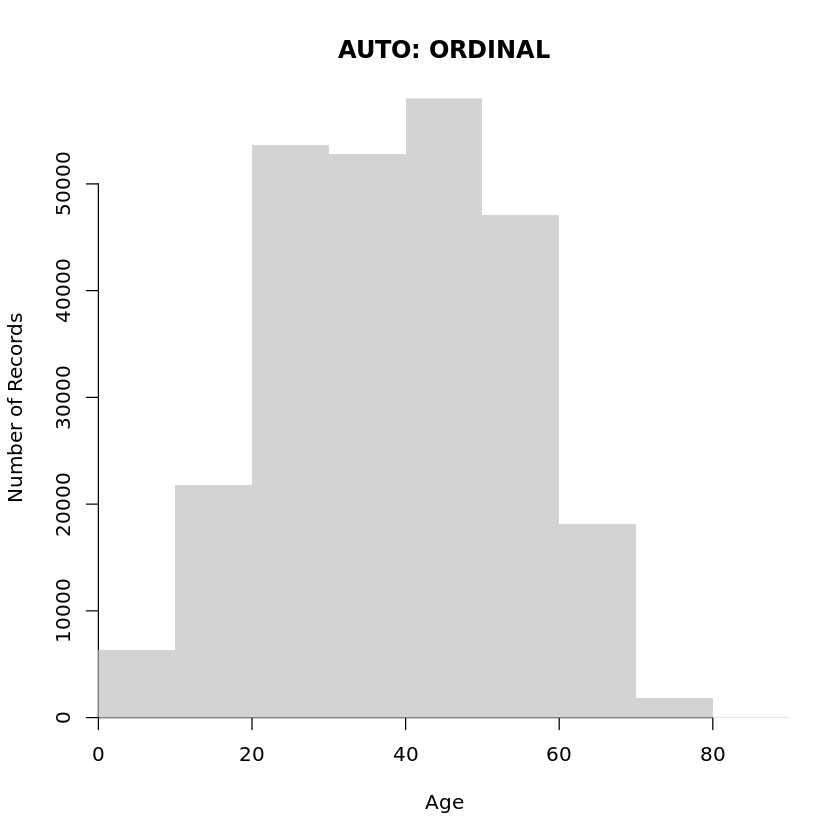

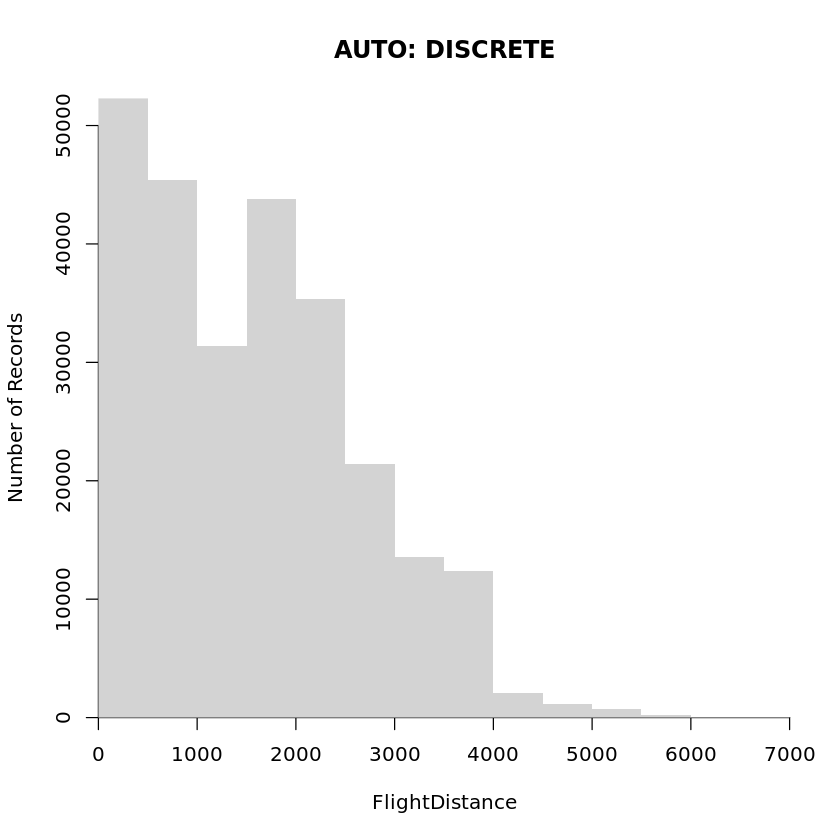

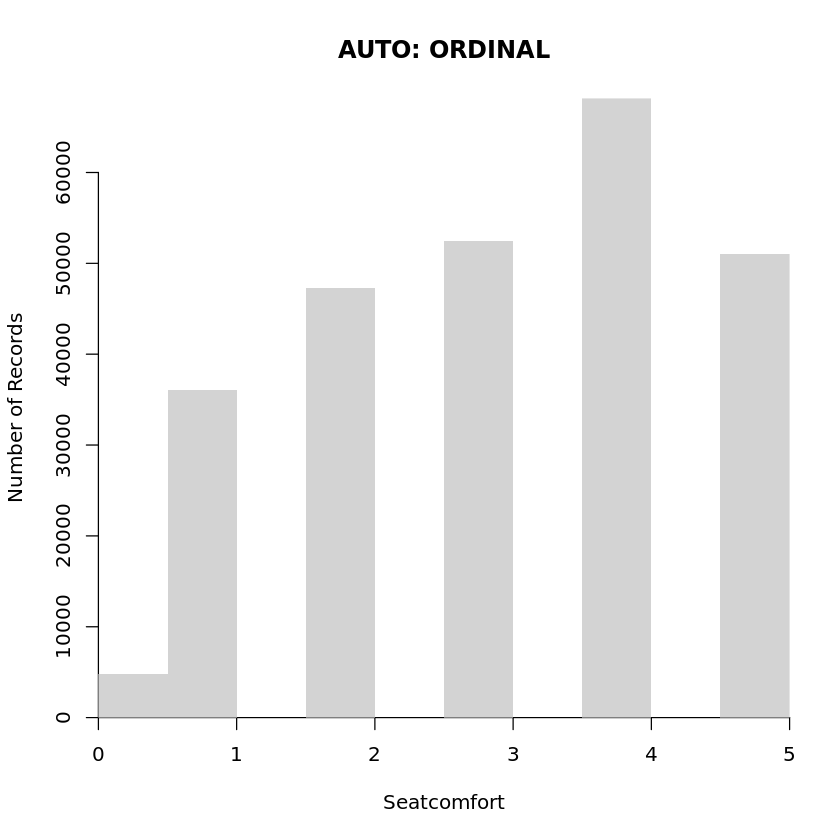

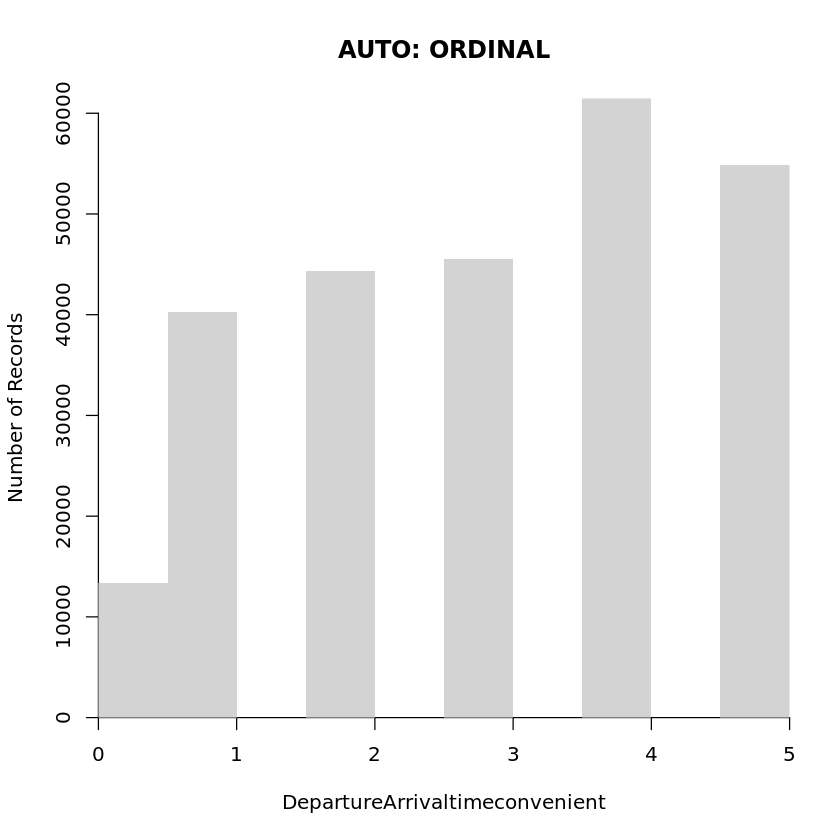

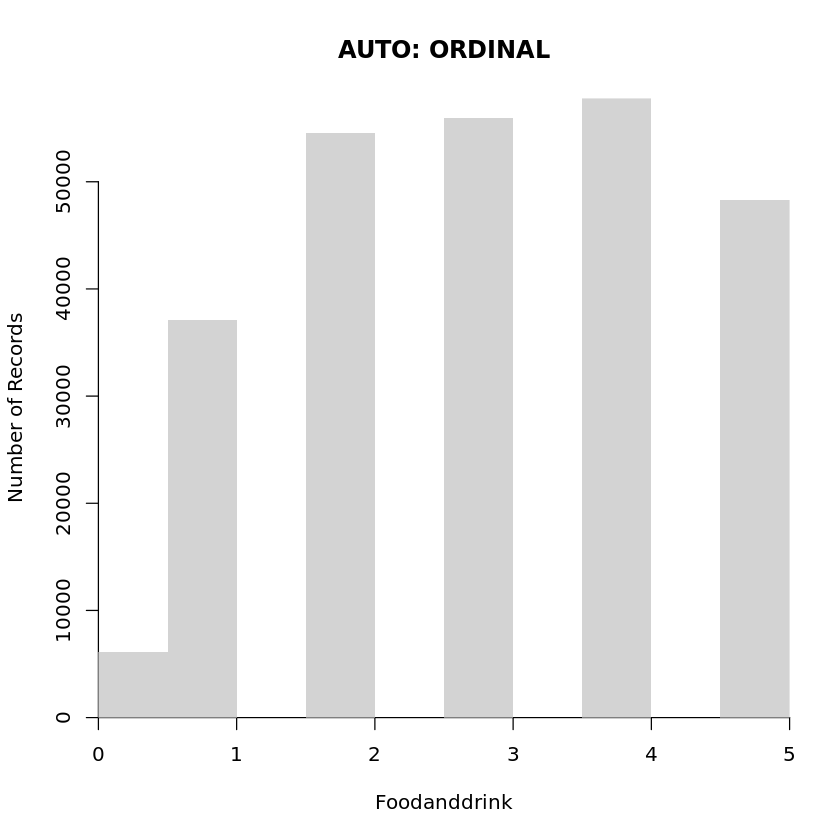

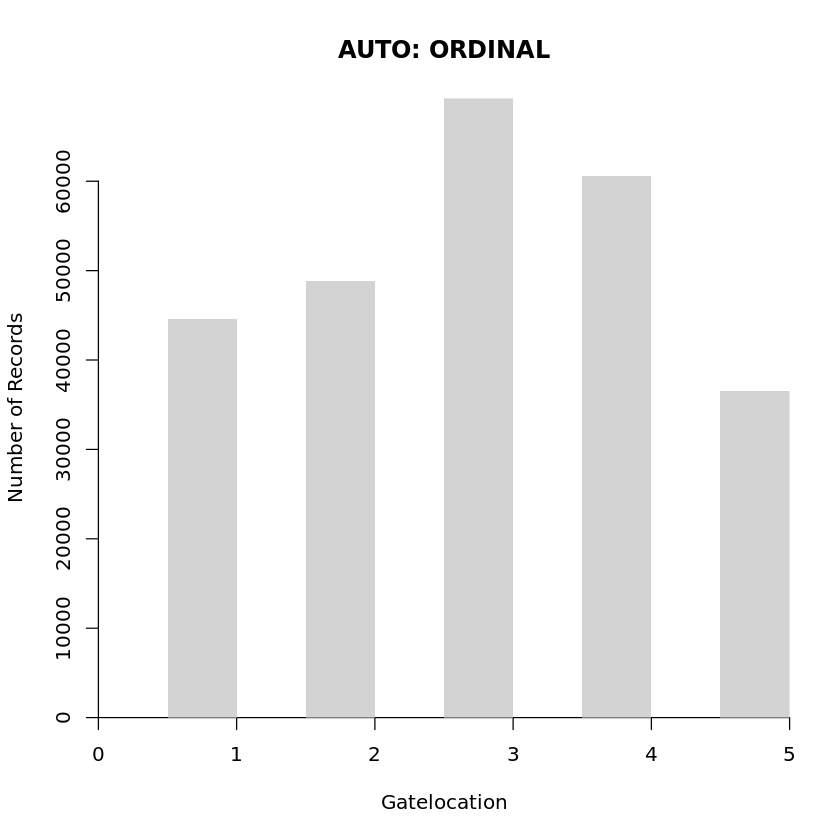

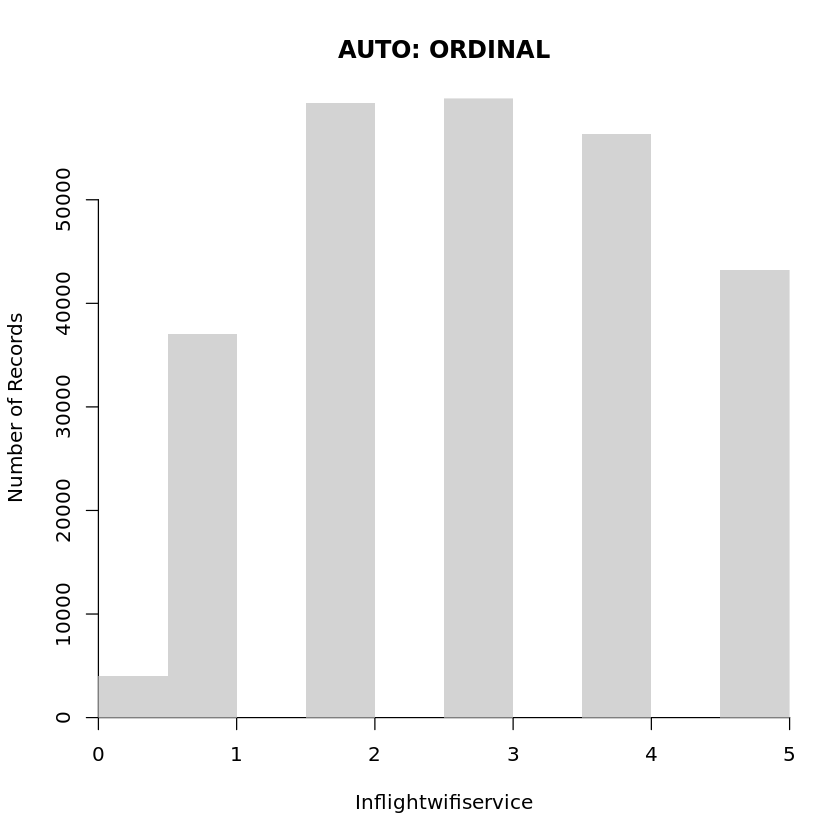

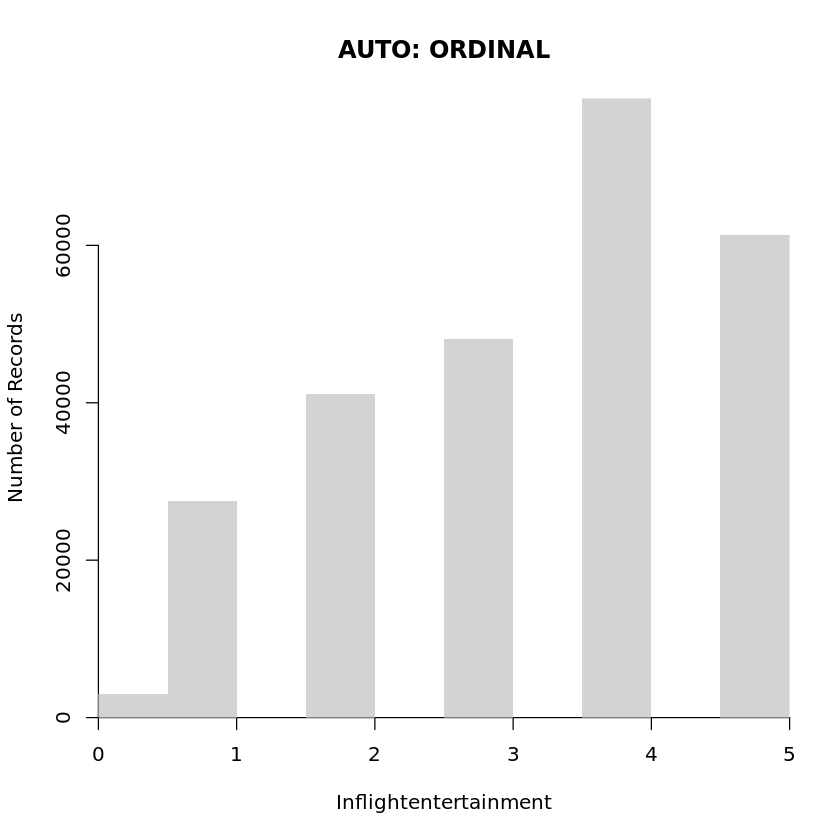

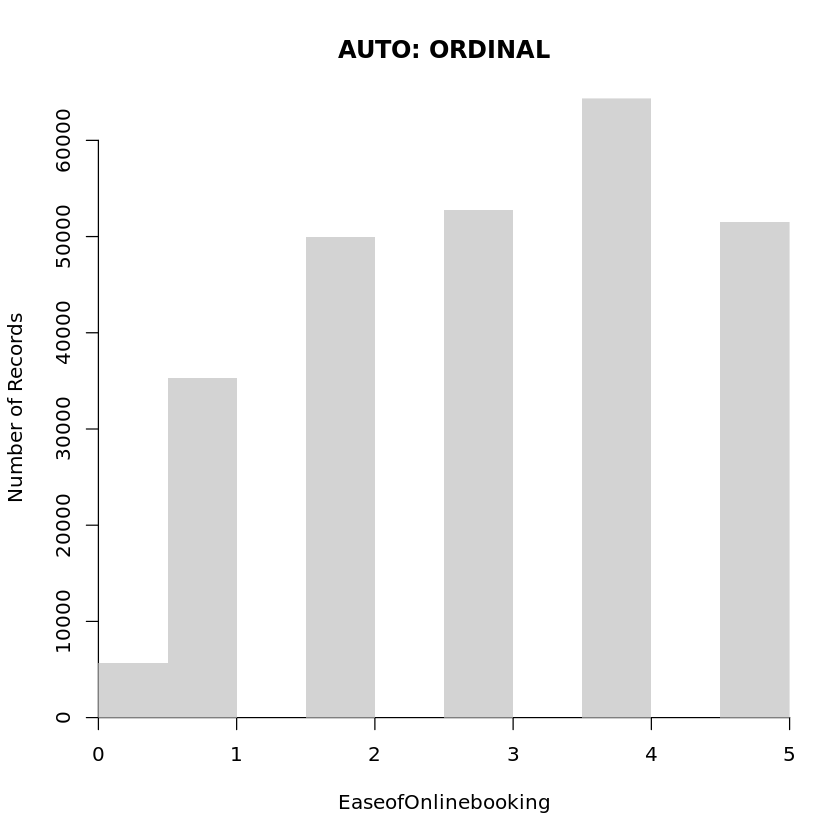

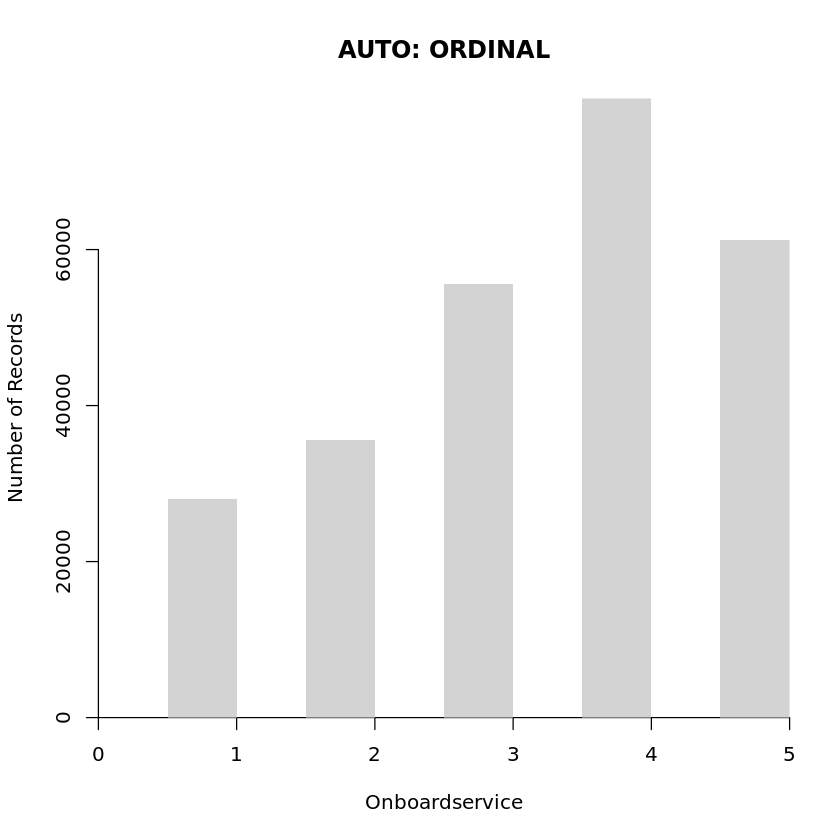

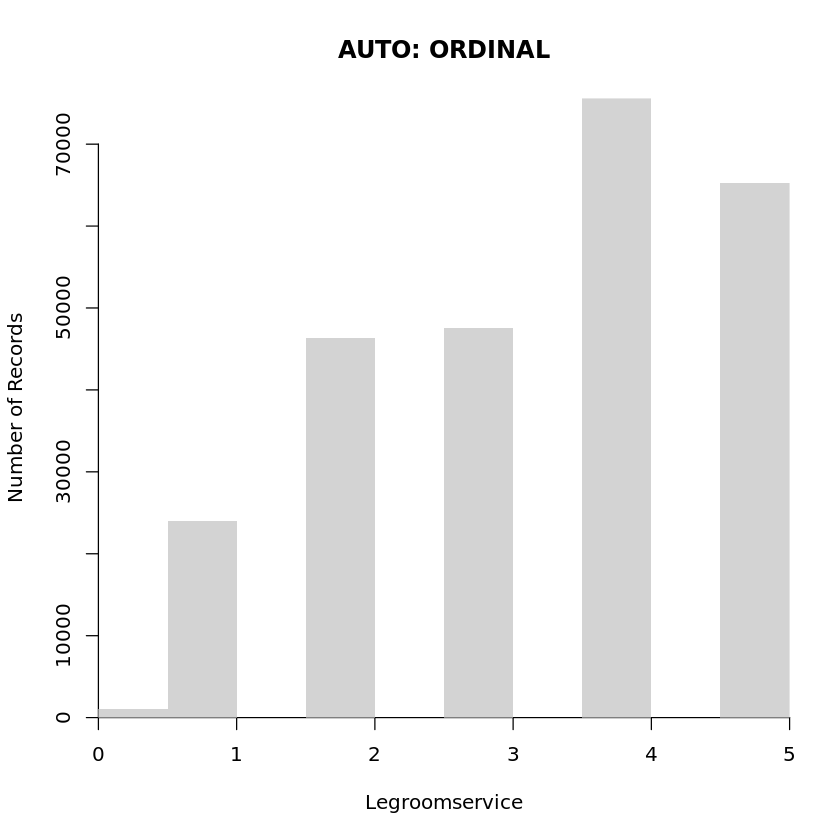

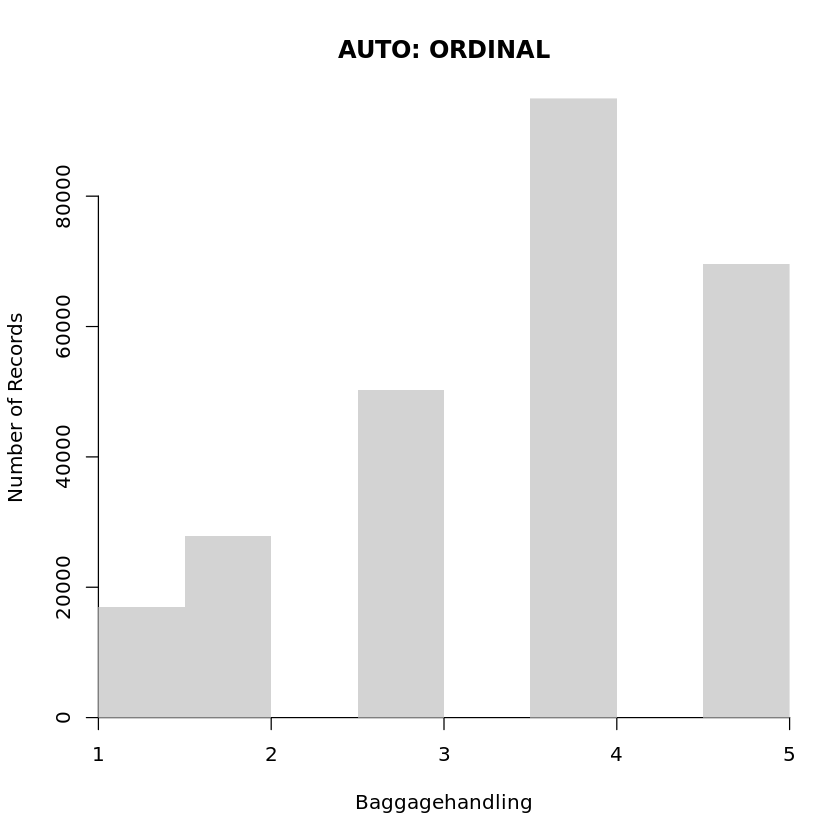

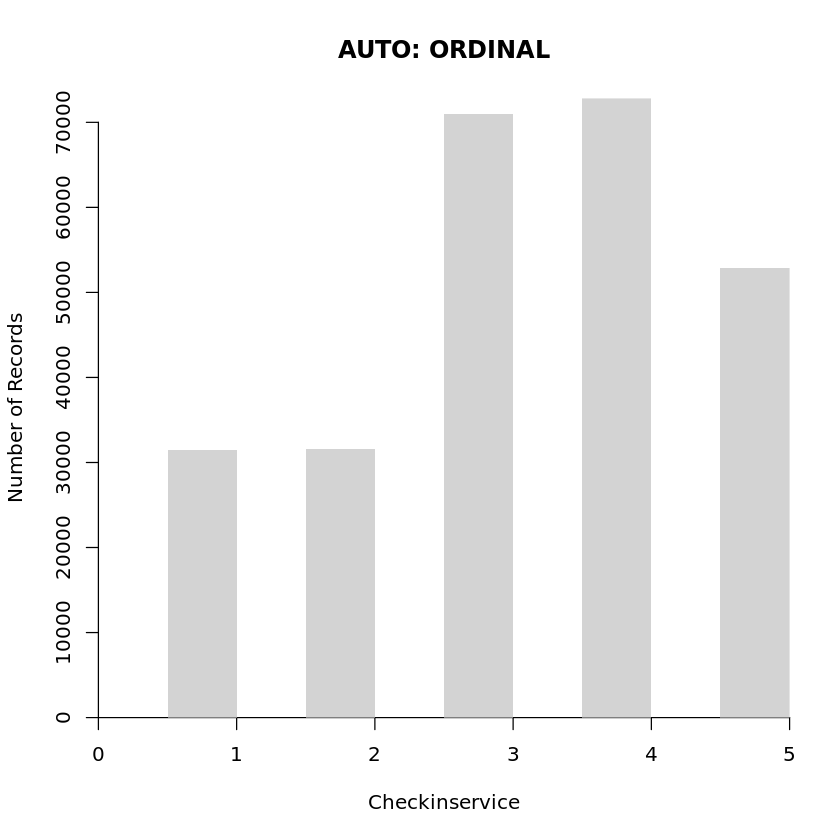

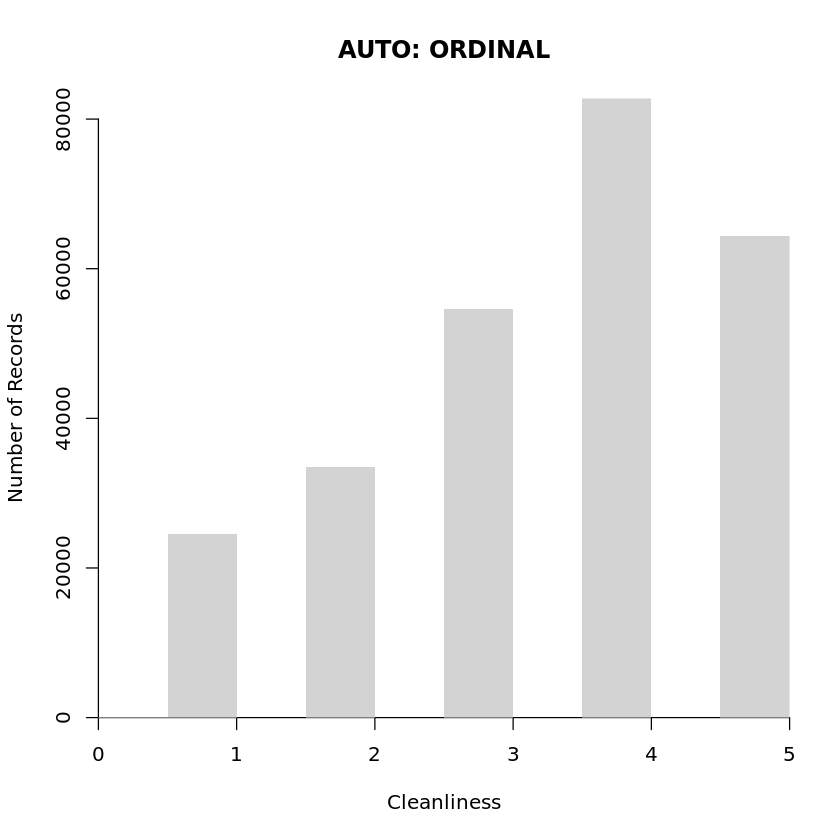

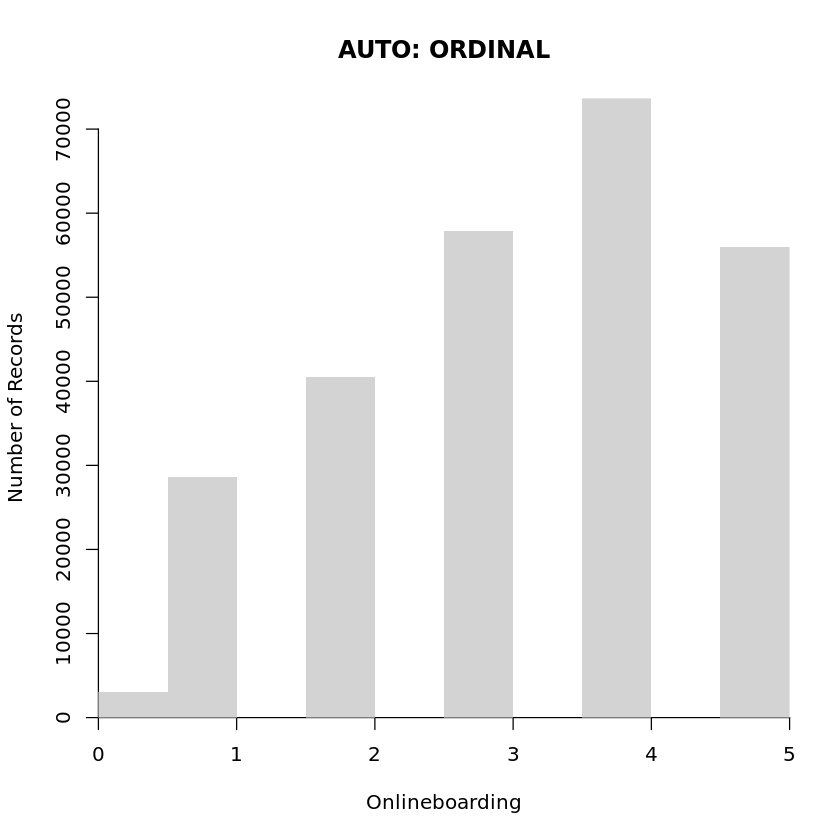

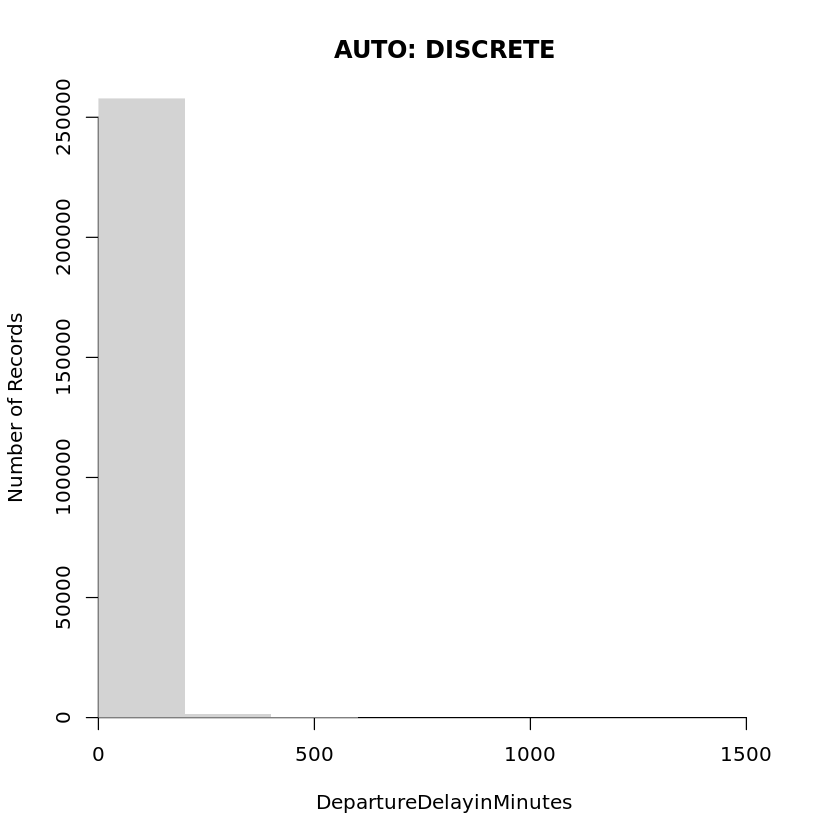

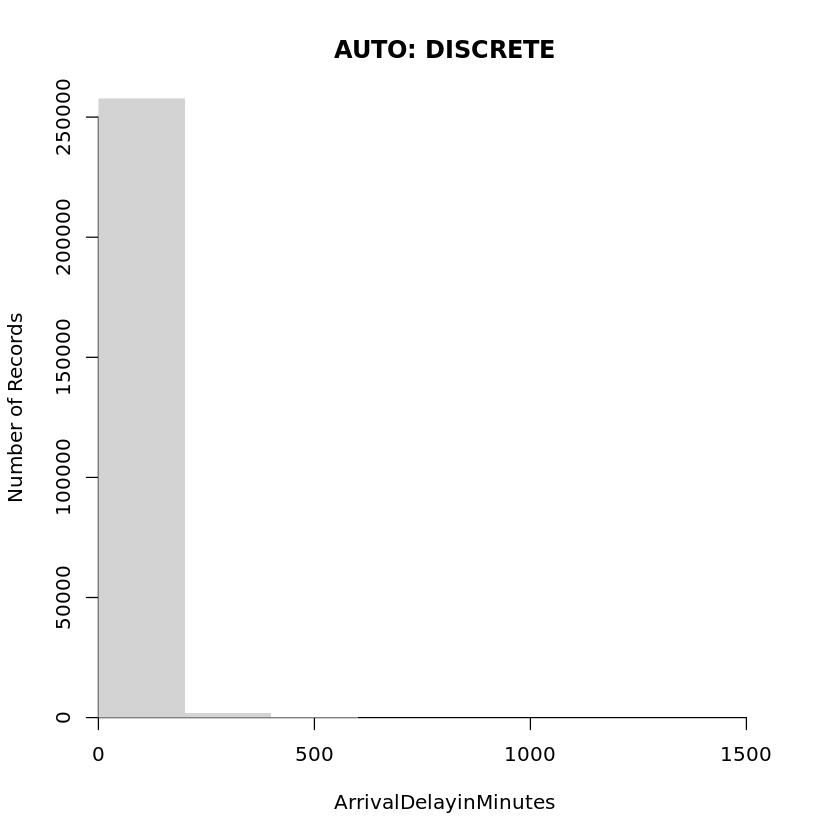

In [6]:
DISCRETE_BINS = 5
field_types_ord_dis<-NPREPROCESSING_discreteNumeric(dataset=dataset,field_types=field_types, cutoff=DISCRETE_BINS)

In [7]:
is_sat<-  ifelse(names(dataset)%in%sat_cols , "SAT", "NOTSAT")
is_time <- ifelse(names(dataset)%in%time_field,"TIME", "NOTTIME")
is_dis <- ifelse(names(dataset)%in%distance_field,'DIS','NOTDIS')
types_table<-data.frame(field=names(dataset),
                        initial=field_types,
                        types=field_types_ord_dis, 
                        is_sat=is_sat,
                        is_time=is_time,
                        is_dis = is_dis)
print(formattable::formattable(types_table))

types_table

field,initial,types,is_sat,is_time,is_dis
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
satisfactionv2,SYMBOLIC,SYMBOLIC,NOTSAT,NOTTIME,NOTDIS
Gender,SYMBOLIC,SYMBOLIC,NOTSAT,NOTTIME,NOTDIS
CustomerType,SYMBOLIC,SYMBOLIC,NOTSAT,NOTTIME,NOTDIS
Age,NUMERIC,ORDINAL,NOTSAT,NOTTIME,NOTDIS
TypeofTravel,SYMBOLIC,SYMBOLIC,NOTSAT,NOTTIME,NOTDIS
Class,SYMBOLIC,SYMBOLIC,NOTSAT,NOTTIME,NOTDIS
FlightDistance,NUMERIC,DISCRETE,NOTSAT,NOTTIME,DIS
Seatcomfort,NUMERIC,ORDINAL,SAT,NOTTIME,NOTDIS
DepartureArrivaltimeconvenient,NUMERIC,ORDINAL,SAT,NOTTIME,NOTDIS


In [8]:
######
# 
# Rescale a satisfaction scale column in range of 0.0-1.0
# Input: 
#
######
Preprocess_satscale<-function(input){
    
    
    # max and min is  5 and 0 respectively since the scale is from 0 to 5
    minscale<-0.0
    maxscale<-5.0
    
    rescale<- ((input-minscale)/(maxscale-minscale))
    
    return(rescale)
}
######
#
# Apply linear normalization for rescale a value in a fields into range 0-1
#
####
Preprocess_ordinalscale<-function(input){
    
     minscale<-min(input)
     maxscale<-max(input)
    
    rescale<- ((input-minscale)/ (maxscale-minscale))
    
    return(rescale)

}

########
#
# Normailze an entire dataframe into range of 0-1
#
######
Preprocess_dataframe<-function(dataset,sat){
    
    if(sat==TRUE){
  
        fields<-sapply(as.data.frame(dataset),Preprocess_satscale)
   
    }else{
   
        fields<-sapply(as.data.frame(dataset),Preprocess_ordinalscale)
    }
    
    return(fields)
}


#######
#
#
# Preprocess Ordinal Value
#
#
#######
Preprocess_ordinal<-function(dataset,fieldtype){
    
   
   sat_position<-which(fieldtype[,'is_sat']=='SAT')

   sat_fields=dataset[,sat_position]
  
   sat_fields<-Preprocess_dataframe(sat_fields,TRUE)
    
   ordinal<-which(fieldtype[,'types']=='ORDINAL')
  
   other_position<- ordinal[!(ordinal %in% sat_position)]
    
   colname = names(dataset[other_position])
   other_ordinal<-dataset[,other_position]
   
 
   other_ordinal<-Preprocess_dataframe(other_ordinal, FALSE)
    
   colnames(other_ordinal) <- colname
    
   processed<- cbind(other_ordinal,sat_fields)
  
   return(processed)
     
  
}

In [10]:

processed_ordinal<-Preprocess_ordinal(dataset,types_table)
head(processed_ordinal)

Age,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,Gatelocation,Inflightwifiservice,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding
0.7435897,0,0,0,0.4,0.4,0.8,0.6,0.6,0.0,0.6,1.0,0.6,0.4
0.5128205,0,0,0,0.6,0.0,0.4,0.6,0.8,0.8,0.8,0.4,0.6,0.4
0.1025641,0,0,0,0.6,0.4,0.0,0.4,0.6,0.6,0.8,0.8,0.8,0.4
0.6794872,0,0,0,0.6,0.6,0.8,0.2,0.2,0.0,0.2,0.8,0.2,0.6
0.8076923,0,0,0,0.6,0.8,0.6,0.4,0.4,0.0,0.4,0.8,0.4,1.0
0.2948718,0,0,0,0.6,0.4,0.0,0.4,1.0,0.8,1.0,1.0,0.8,0.4


In [34]:
######
#
#Convert a time delay in minutes into 3 numbers represent 3 categorie
#
# 1. No Delays
# 2. 0-30 minutes delays
# 3. 30 and above delays
#
#####
Convert_minuteDelay<-function(data){
    
   
    out<-ifelse(data==0,'0',
         ifelse(data<30,"1",
         ifelse(data<60,"2","3")))
    
    return((out))
}

Process_timeDelay<-function(dataset){
    
    out<-sapply(dataset,Convert_minuteDelay)
  
    return(out)
}

Process_distance<-function(dataset){
    
    
    
}


In [45]:
categor_data<-dataset[,symbolic_index]
time_data<-dataset[,time_field]
#time_data<-Process_timeDelay(time_data)
distance_data<-dataset[,distance_field]
#categor_data<-cbind(categor_data,time_data)
#categor_data<-cbind(categor_data,distance_data)
head(categor_data)


,satisfactionv2,Gender,CustomerType,TypeofTravel,Class
,<chr>,<chr>,<chr>,<chr>,<chr>
1,satisfied,Female,Loyal Customer,Personal Travel,Eco
2,satisfied,Male,Loyal Customer,Personal Travel,Business
3,satisfied,Female,Loyal Customer,Personal Travel,Eco
4,satisfied,Female,Loyal Customer,Personal Travel,Eco
5,satisfied,Female,Loyal Customer,Personal Travel,Eco
6,satisfied,Male,Loyal Customer,Personal Travel,Eco


In [46]:
Preprocess_categorical<-function(dataset){

  catagorical<-data.frame()

  field_name<-names(dataset)

  for (field in field_name){

    # Convert into factors. A level for each unique string
    ffield<-factor(dataset[,field])

 

    # 1-hot encoding. A new column for each unique "level"
    xx<-data.frame(model.matrix(~ffield+0, data=ffield))

    names(xx)<-gsub("ffield",field,names(xx))

    # If 2 unique values, then can encode as a single "binary" column
    if (ncol(xx)==2){
      xx<-xx[,-2,drop=FALSE]
      names(xx)<-field  # Field name without the value appended
    }

  catagorical<-as.data.frame(append(catagorical,xx))

  } #endof for()
  return (catagorical)

} # endof categorical_encoding()

processed_catdata<-Preprocess_categorical(categor_data)
head(processed_catdata)

,satisfactionv2,Gender,CustomerType,TypeofTravel,ClassBusiness,ClassEco,ClassEco.Plus
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0
4,0,1,0,0,0,1,0
5,0,1,0,0,0,1,0
6,0,0,0,0,0,1,0


In [47]:
a <-dataset[, grepl(distance_field, names(dataset)), drop = FALSE]

In [48]:
s<-summary(a)

In [49]:
processed_data<-cbind(processed_catdata, processed_ordinal)

In [50]:
# Convert label 0 to 1 and vice versa for satisfation label to represent 1 for statisfy  and 0 for not 
processed_data$satisfactionv2 <- ifelse(as.numeric(processed_data$satisfactionv2)==0,1,0)

In [43]:
write.csv(processed_data,'./processed.csv')

In [52]:
processed_data<-cbind(processed_data,time_data)
processed_data<-cbind(processed_data,distance_data)
#categor_data<-cbind(categor_data,time_data)
#categor_data<-cbind(categor_data,distance_data)
head(processed_data

satisfactionv2,Gender,CustomerType,TypeofTravel,ClassBusiness,ClassEco,ClassEco.Plus,Age,Seatcomfort,DepartureArrivaltimeconvenient,⋯,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes,distance_data
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,0,0,0,1,0,0.74358974,0,0.0,⋯,0.6,0.6,0.0,0.6,1.0,0.6,0.4,0,0,265
1,0,0,0,1,0,0,0.51282051,0,0.0,⋯,0.6,0.8,0.8,0.8,0.4,0.6,0.4,310,305,2464
1,1,0,0,0,1,0,0.10256410,0,0.0,⋯,0.4,0.6,0.6,0.8,0.8,0.8,0.4,0,0,2138
1,1,0,0,0,1,0,0.67948718,0,0.0,⋯,0.2,0.2,0.0,0.2,0.8,0.2,0.6,0,0,623
1,1,0,0,0,1,0,0.80769231,0,0.0,⋯,0.4,0.4,0.0,0.4,0.8,0.4,1.0,0,0,354
1,0,0,0,0,1,0,0.29487179,0,0.0,⋯,0.4,1.0,0.8,1.0,1.0,0.8,0.4,0,0,1894
1,1,0,0,0,1,0,0.75641026,0,0.0,⋯,1.0,1.0,0.0,1.0,1.0,1.0,0.6,17,15,227
1,0,0,0,0,1,0,0.03846154,0,0.0,⋯,0.4,0.6,0.6,0.8,1.0,0.8,0.4,0,0,1812
1,1,0,0,1,0,0,0.62820513,0,0.0,⋯,0.8,0.8,0.0,0.2,1.0,0.8,0.8,0,0,73


In [53]:
head(processed_data)

,satisfactionv2,Gender,CustomerType,TypeofTravel,ClassBusiness,ClassEco,ClassEco.Plus,Age,Seatcomfort,DepartureArrivaltimeconvenient,⋯,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes,distance_data
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,1,0,0,0,1,0,0.7435897,0,0,⋯,0.6,0.6,0.0,0.6,1.0,0.6,0.4,0,0,265
2,1,0,0,0,1,0,0,0.5128205,0,0,⋯,0.6,0.8,0.8,0.8,0.4,0.6,0.4,310,305,2464
3,1,1,0,0,0,1,0,0.1025641,0,0,⋯,0.4,0.6,0.6,0.8,0.8,0.8,0.4,0,0,2138
4,1,1,0,0,0,1,0,0.6794872,0,0,⋯,0.2,0.2,0.0,0.2,0.8,0.2,0.6,0,0,623
5,1,1,0,0,0,1,0,0.8076923,0,0,⋯,0.4,0.4,0.0,0.4,0.8,0.4,1.0,0,0,354
6,1,0,0,0,0,1,0,0.2948718,0,0,⋯,0.4,1.0,0.8,1.0,1.0,0.8,0.4,0,0,1894


In [54]:
write.csv(processed_data,'./uncleantime_processed.csv')